<a href="https://colab.research.google.com/github/yna2131/SemanaTec/blob/main/actividad09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad - Estadística básica**

* **Nombre:** Yuna Chung
* **Matrícula:** A01709043

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. **Nota:** Recuerda habrá una penalización de 50 puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [51]:
# Carga las librerías necesarias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [52]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'
  .format(name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories (2).csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [53]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:

* **Name:** Nombre del libro.
* **Author:** Autor.
* **User Rating:** Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews:** Número de reseñas.
* **Price:** Precio del libro.
* **Year:** Año de publicación.
* **Genre:** Género literario (ficción/no ficción).

## Análisis estadístico

1. Carga la tabla de datos y haz un análisis estadístico de las variables.
2. Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
3. Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
4. Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
5. Calcula la correlación de las variables que consideres relevantes.

In [54]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [55]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [59]:
# Correlación de variables (relevantes) 
selected = df.drop(columns=['Name', 'Author', 'Year'])

r, p = stats.pearsonr(selected['Price'], selected['User Rating'])
print(f"Correlación Pearson (Price - User Rating): r={r}, p-value={p}")

r, p = stats.pearsonr(selected['Price'], selected['Reviews'])
print(f"Correlación Pearson (Price - Reviews): r={r}, p-value={p}")

r, p = stats.pearsonr(selected['User Rating'], selected['Reviews'])
print(f"Correlación Pearson (User Rating - Reviews): r={r}, p-value={p}")

Correlación Pearson (Price - User Rating): r=-0.13308628728087996, p-value=0.0017601566810130124
Correlación Pearson (Price - Reviews): r=-0.10918188342780519, p-value=0.01039572527970311
Correlación Pearson (User Rating - Reviews): r=-0.001729014255549977, p-value=0.9677289828976261


**Q. Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?**

A.
* User Rating
  * Basándome en la media, pude observar que la mayoría de los usuarios tiene una calificación entre 4 y 5 estrellas. Esto se puede comprobar con la desviación estándar, que al ser de tan solo 0.2, se indica que los datos se encuentran muy juntos entre sí por los que son muy similares. La mediana confirma el hipótesis, ya que vemos que el 50% de los datos se observa nuevamente con valores muy parecidos.
* Reviews
  * El promedio de todos los reviews es muy alto, y al mismo tiempo su desviación estándar también. Esto significa que los datos se encuentran muy separados entre sí, lo cual indica que hubo muchas reseñas para un libro y muy pocas para otro. Por lo tanto, tenemos un promedio muy alto, pero que no nos dice nada realmente. En este punto, la mediana tampoco nos ayuda demasiado, ya que solo acomoda la cantidad de reseñas para arrojarnos el dato.
* Price
  * Tanto la mediana como la media son muy parecidas, aunque la desviación estándar tiene un valor relativamente alto de 10. Con este dado, podemos saber que los datos tienen valores muy extremos.
* Year
  * El año no nos arroja datos muy importantos, ya que sus estadísticas no se van a analizar.

**Q. ¿Cuáles son las variables relevantes e irrelevantes para el análisis?**

A.

Variables Relevantes:
* User Rating
* Genre
* Price

Variables Irrelevantes:
* Año
* Reviews
* Name
* Author

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

**Q. Responde las siguientes preguntas:**

1. ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
2. ¿Existen variables que tengan datos extraños?
3. Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
4. ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:

* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión

Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 1.05, 'Variables con respecto del Género')

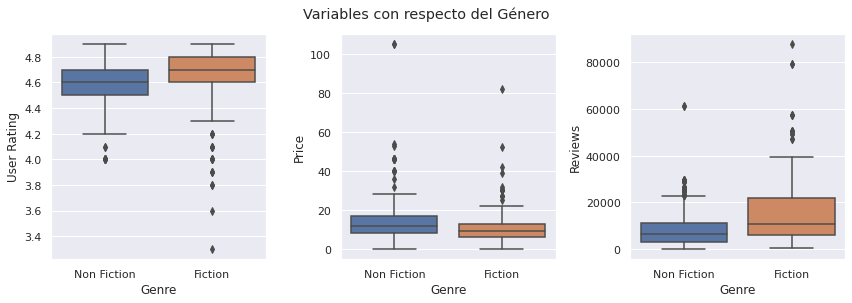

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.boxplot(data=df, y='User Rating', x = 'Genre', ax=axs[0])
sns.boxplot(data=df, y='Price', x = 'Genre', ax=axs[1])
sns.boxplot(data=df, y='Reviews', x = 'Genre',  ax=axs[2])

plt.tight_layout()
plt.suptitle('Variables con respecto del Género', y = 1.05)

Text(0.5, 1.05, 'Grupo por Género')

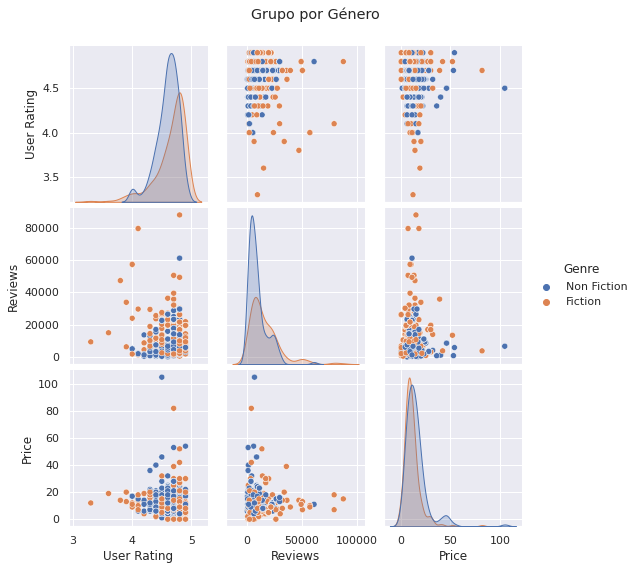

In [63]:
# Gráfico de dispersión.
sns.pairplot(data=selected, hue='Genre')
plt.suptitle('Grupo por Género', y=1.05)

<Axes: >

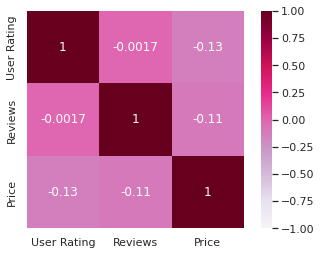

In [64]:
sns.heatmap(data = selected.corr(), vmin=-1, vmax=1, cmap = 'PuRd', annot=True, square = True)

**A. Respondiendo a las preguntas:**

1. Nombre, Autor y año ya que son variables que no aportan al análisis y son irrelevantes.
2. Price, User Rating y Reviews
3. Comparando las variables, podemos ver que no todas están en rangos similares, pero para el clustering sí afectaría.
4. Se pueden encontrar grupos que se parezcan, cuales son Price y Reviews.


**A. Conclusión** 

Creo que sería una mejor opción eliminar valores atípicos para tener una mejor visión de los datos. Base en las gráficas creadas anteriormente, es posible saber que los libros de ficción tiene mejor User Rating y Reviews comparados con los de no-ficción.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.

* Determina un valor de $k$
  * 4
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas

* ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
  * Creo que sí porque estos nos ayudan a agruparlos en distintos clusters para así poder trabajar con ellos.
* ¿Cómo obtuviste el valor de $k$ a usar?
  * Realizando el análisis con el método de Silhouette y el codo, y escogimos el último para trabajar
* ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
  * Si usamos el valor más alto, tenemos más grupos con datos un poco más parecidos, y un caso contrario si usamos el valor más bajo.
* ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
  * Los centros se volverían más dispersos y por lo tanto costaría más trabajo manejarlos.
* ¿Qué puedes decir de los datos basándose en los centros?
  * Los datos quedan bien encasillados en los clusters, siendo estos centros representativos en el análisis de estos datos.

In [65]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
# Algoritmo de KMeans
numeric_cols = ['User Rating', 'Price',	'Reviews']
x = selected.loc[:, numeric_cols]

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

x_norm = pd.DataFrame(x_norm, columns=numeric_cols)
x_norm.head()

,User Rating,Price,Reviews
0,0.359990,-0.470810,0.460453
1,-0.080978,0.821609,-0.844786
2,0.359990,0.175400,0.599440
3,0.359990,-0.655441,0.808050
4,0.800958,-0.101547,-0.365880


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

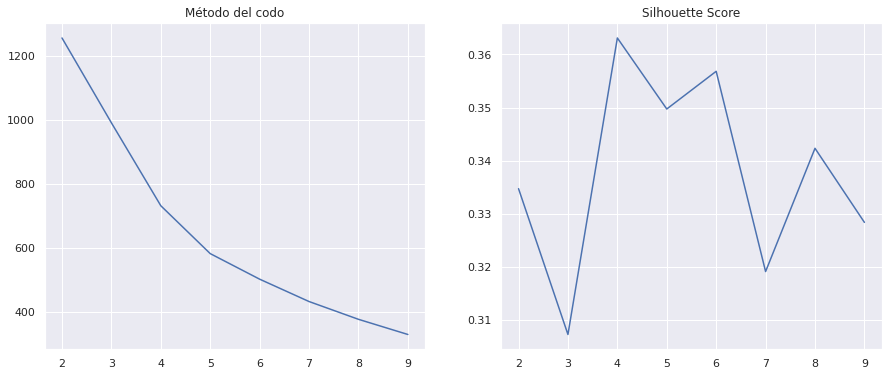

In [66]:
# Determinación de k.
wcss   = []
sil_score = []

for k in range(2,10):
  model = KMeans(n_clusters = k, random_state = 47)
  groups = model.fit_predict(x_norm)
  wcss.append(model.inertia_)
  sil_score.append(silhouette_score(x_norm, groups))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Codo
axs[0].plot(range(2,10), wcss)
axs[0].set_title('Método del codo')

# Silhouette Score
axs[1].plot(range(2,10), sil_score)
axs[1].set_title('Silhouette Score')

In [67]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(x_norm)
selected['Group'] = clusters.astype('str')
selected.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Genre,Group
0,4.7,17350,8,Non Fiction,0
1,4.6,2052,22,Fiction,2
2,4.7,18979,15,Non Fiction,0
3,4.7,21424,6,Fiction,0
4,4.8,7665,12,Non Fiction,2


Para estas gráficas que se muestran anteriormente, escogimos 4 clusters ya que ahí es donde el pico de la gráfica de Silhouette se ve más arriba y en la gráfica del método del codo, observamos cómo rápidamente se pronuncia hacia abajo en el punto 4.

**Q. Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?**

A.

* El Grupo 0 cuenta con muchos Reviews (en miles), buen Rating y valor aceptable para Price. Le pondría el nombre *'ModerateValues'*.
* El Grupo 1 cuenta con muchos Reviews (en miles), menor Rating que el Grupo 0, pero un buen valor del Price. Le pondría el nombre *'LowestPriceValue'*.
* El Grupo 2 cuenta con muchos Reviews (máximo 2k), buenos Ratings y el un valor más elevado que los grupos 1 y 2 para Price. Le pondría el nombre *'HighestPriceValue'*.
* El Grupo 3 cuenta con muy pocos Reviews, un costo muy elevado, pero con muy buenos Ratings. le pondría el nombre *'LowestAmountReviews'*.

In [69]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

selected.groupby('Group').mean()

,User Rating,Reviews,Price
Group,,,
0,4.693846,27444.646154,9.084615
1,4.232143,8631.666667,12.416667
2,4.698065,6753.977419,11.900000
3,4.538462,7219.538462,49.692308


In [71]:
selected.groupby('Group').std()

,User Rating,Reviews,Price
Group,,,
0,0.184161,12779.526505,3.833825
1,0.208933,9097.337152,5.013736
2,0.118770,4145.890023,6.819423
3,0.144435,6978.798305,18.750508


Text(0.5, 1.05, 'Grupos de Best Sellers')

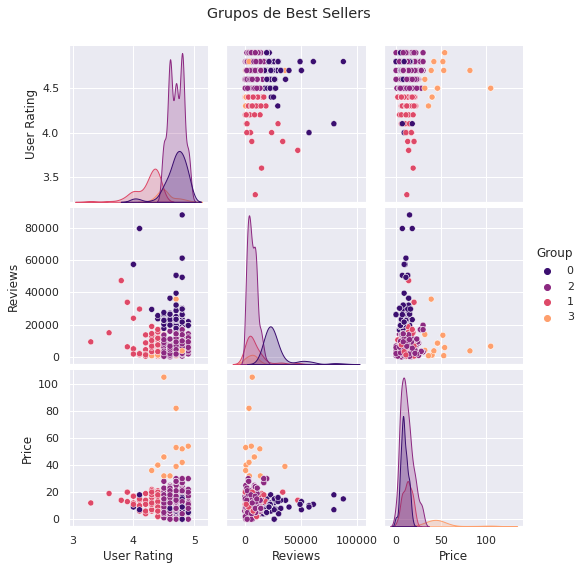

In [75]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

sns.pairplot(data = selected, hue = 'Group', palette = 'magma')
plt.suptitle('Grupos de Best Sellers', y = 1.05)

In [76]:
fig = px.scatter_3d(selected, x = 'Price', y = 'User Rating', 
                    z = 'Reviews', 
                    title='Grupos de libros',
                    color='Group',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()